In [ ]:
!pip install pycaret

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [ ]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["visibility_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    227857.000000
mean       8247.670666
std        3106.366306
min          48.000000
25%        7998.000000
50%        9994.000000
75%        9994.000000
max        9994.000000
Name: visibility_o, dtype: float64

In [ ]:
#resample visibility minor hour before
station=station_all[["visibility_o","temp_o"]].resample("H",label="right").min()


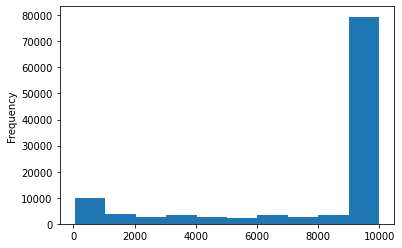

In [ ]:
from locale import normalize
#station.value_counts()
station["visibility_o"].plot.hist();

In [ ]:
#visibility to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels=['<= 1000 m', '> 1000 m']
station["vis_l"]=pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station=station.drop(columns=["temp_o"])
station.sample(20)

,visibility_o,vis_l
time,,
2010-02-07 01:00:00,9994.0,> 1000 m
2009-05-13 00:00:00,9656.0,> 1000 m
2014-02-22 23:00:00,9994.0,> 1000 m
2015-12-22 02:00:00,9994.0,> 1000 m
2012-09-09 18:00:00,9994.0,> 1000 m
2015-03-08 18:00:00,9994.0,> 1000 m
2020-11-15 15:00:00,998.0,<= 1000 m
2017-06-22 16:00:00,9994.0,> 1000 m
2013-06-16 09:00:00,9994.0,> 1000 m


**Forecast D1**

In [ ]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")
ria_model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,187.022110,8.649026,15.076856,100682.117188,284.099640,0.950480,3850.537842,18.529049,365.889740,0.43,...,0.000000,-0.000117,0.0,1.001866,1.0000,1.001866,5441.062012,1395.217041,250.198868,277.625000
2008-01-02 01:00:00,223.194687,4.872746,8.553699,100766.039062,284.302551,0.952351,24042.478516,7.432752,365.840179,1.41,...,271.859985,-0.630313,1.0,1.003662,1.0000,1.003662,5421.849121,1390.475952,249.379623,276.878235
2008-01-02 02:00:00,213.398468,4.058958,7.745996,100725.421875,283.516113,0.931136,24043.144531,10.536634,361.979858,0.15,...,265.820007,-2.348477,0.0,0.003704,0.0000,0.003704,5403.857910,1385.831055,247.717194,276.178528
2008-01-02 03:00:00,193.151459,4.297006,8.272406,100640.812500,283.482239,0.911970,24036.058594,16.033491,323.539062,0.66,...,271.260010,-4.300562,1.0,0.000267,1.0000,1.000000,5392.368164,1382.380981,247.006317,275.906799
2008-01-02 04:00:00,185.437576,5.599997,9.705170,100599.703125,283.220490,0.917263,24037.439453,16.895048,324.586517,1.60,...,274.359985,-3.418750,1.0,0.003440,1.0000,1.000000,5385.979004,1380.468018,246.807068,276.245819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 19:00:00,157.686142,1.743530,4.707931,102008.992188,286.765930,0.922937,24102.066406,4.728705,312.395416,0.00,...,0.000000,-0.002773,0.0,0.500000,0.4000,0.500000,5657.847168,1509.066895,256.351013,281.325867
2020-11-12 20:00:00,132.306030,0.214833,3.802512,102066.460938,286.126678,0.942450,24164.826172,2.759448,370.614349,0.00,...,0.000000,0.000352,0.0,0.300000,0.5000,0.500000,5660.977051,1513.237671,256.373871,281.351135
2020-11-12 21:00:00,136.384262,1.121570,5.705152,102124.367188,286.267761,0.931932,24214.123047,3.625571,351.971375,0.00,...,0.000000,0.000469,0.0,0.300000,0.0625,0.300000,5664.547852,1517.838257,256.420868,280.955627


In [ ]:
#label meteorological model prec points 0 to 9
ria_model4k["visibility0_l"]=pd.cut(ria_model4k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility1_l"]=pd.cut(ria_model4k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility2_l"]=pd.cut(ria_model4k["visibility2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility3_l"]=pd.cut(ria_model4k["visibility3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility4_l"]=pd.cut(ria_model4k["visibility4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility5_l"]=pd.cut(ria_model4k["visibility5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility6_l"]=pd.cut(ria_model4k["visibility6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [ ]:
#concat station model
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["visibility_o"])
df_all4k[["vis_l","visibility0_l","visibility1_l"]].sample(20)

,vis_l,visibility0_l,visibility1_l
time,,,
2010-06-27 11:00:00,> 1000 m,> 1000 m,> 1000 m
2017-09-30 05:00:00,> 1000 m,> 1000 m,> 1000 m
2016-03-08 05:00:00,> 1000 m,> 1000 m,> 1000 m
2016-01-04 02:00:00,> 1000 m,> 1000 m,> 1000 m
2012-05-05 11:00:00,> 1000 m,> 1000 m,> 1000 m
2019-02-27 21:00:00,> 1000 m,> 1000 m,> 1000 m
2019-06-03 11:00:00,> 1000 m,> 1000 m,> 1000 m
2018-01-20 18:00:00,<= 1000 m,<= 1000 m,> 1000 m
2014-03-07 17:00:00,> 1000 m,> 1000 m,> 1000 m


In [ ]:
print("station\n",df_all4k["vis_l"].value_counts())
print("point 0\n",df_all4k["visibility0_l"].value_counts())
print("point 1\n",df_all4k["visibility1_l"].value_counts())
print("point 2\n",df_all4k["visibility2_l"].value_counts())
print("point 3\n",df_all4k["visibility3_l"].value_counts())
print("point 4\n",df_all4k["visibility4_l"].value_counts())
print("point 5\n",df_all4k["visibility5_l"].value_counts())


station
 > 1000 m     102252
<= 1000 m      9481
Name: vis_l, dtype: int64
point 0
 > 1000 m     106570
<= 1000 m      5163
Name: visibility0_l, dtype: int64
point 1
 > 1000 m     106474
<= 1000 m      5259
Name: visibility1_l, dtype: int64
point 2
 > 1000 m     105456
<= 1000 m      6277
Name: visibility2_l, dtype: int64
point 3
 > 1000 m     107569
<= 1000 m      4164
Name: visibility3_l, dtype: int64
point 4
 > 1000 m     109249
<= 1000 m      2484
Name: visibility4_l, dtype: int64
point 5
 > 1000 m     108054
<= 1000 m      3679
Name: visibility5_l, dtype: int64


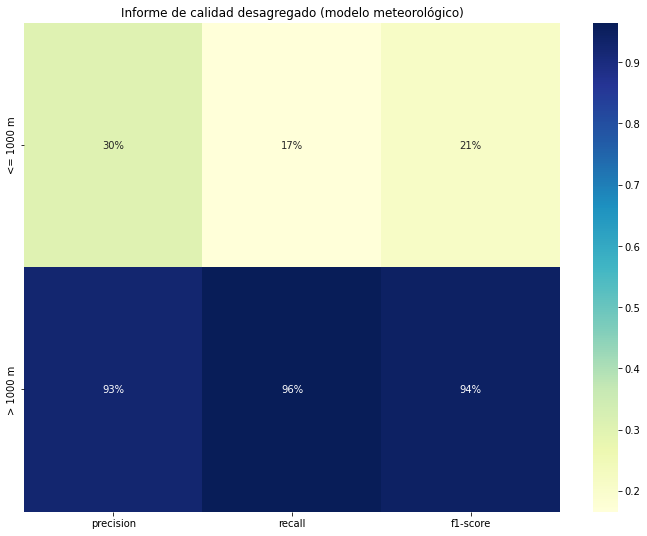

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.vis_l, df_all4k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


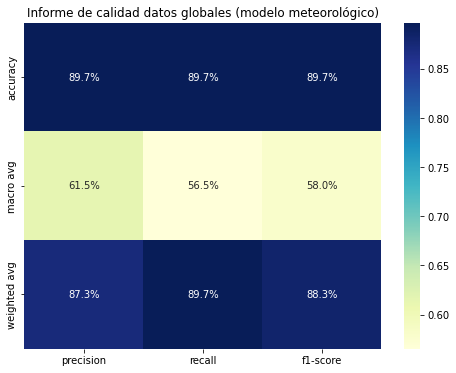

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

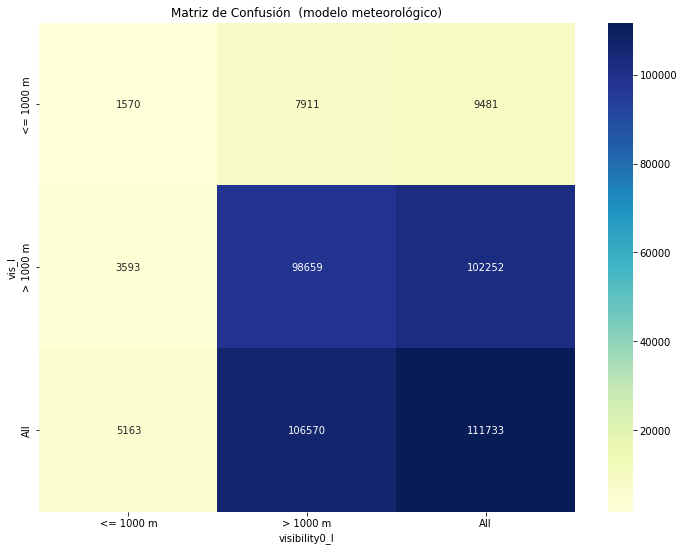

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
import seaborn as sns
global_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

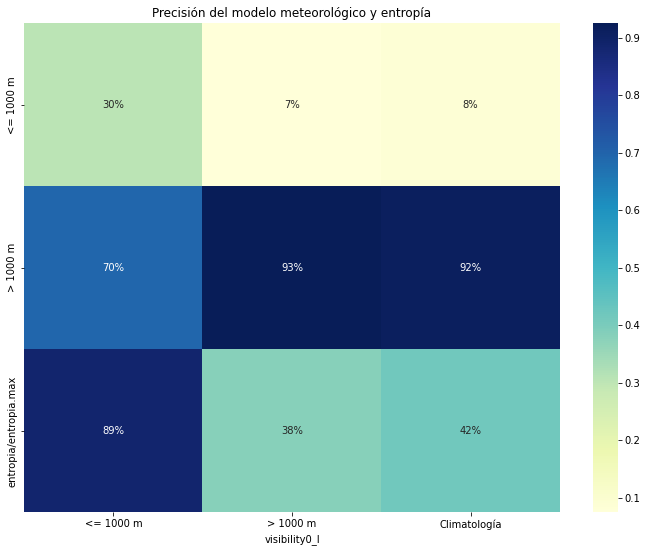

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast D0**

In [ ]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
ria_model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,144.628357,3.831499,6.448897,102287.132812,280.022430,0.892607,24102.808594,12.980614,293.892212,0.0,...,0.0,-0.000188,1.0,0.000000,0.000000,1.00000,5597.893066,1497.146240,253.327194,277.210388
2008-01-01 02:00:00,147.921097,3.832692,6.672883,102206.570312,280.007874,0.876593,24068.431641,16.218111,301.791016,0.0,...,0.0,0.000039,1.0,0.000000,0.530000,1.00000,5589.398926,1489.944702,252.961868,277.016876
2008-01-01 03:00:00,143.393280,5.442433,8.808276,102199.117188,280.104797,0.852357,24079.357422,30.171259,310.720306,0.0,...,0.0,0.000066,1.0,0.000000,1.000000,1.00000,5583.069824,1489.035278,252.982819,276.464508
2008-01-01 04:00:00,148.121201,5.950326,9.456440,102130.187500,280.257111,0.826763,24082.630859,39.340668,311.036621,0.0,...,0.0,0.000102,1.0,0.000000,1.000000,1.00000,5578.958984,1486.376465,252.923691,276.808807
2008-01-01 05:00:00,144.934830,6.004587,9.431707,102095.398438,280.096802,0.815603,24156.925781,38.444511,268.789703,0.0,...,0.0,-0.000305,0.0,0.000000,0.000000,0.00000,5576.894043,1483.500488,253.006378,277.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,0.0,...,0.0,0.000750,0.6,0.093750,0.000000,0.60000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,0.0,...,0.0,0.000316,0.5,0.500000,0.531250,0.53125,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,0.0,...,0.0,-0.000039,0.6,0.500000,0.453125,0.60000,5681.215820,1519.740967,258.154877,280.516174


In [ ]:
#label meteorological model visibility points 0 to 9
ria_model4k["visibility0_l"]=pd.cut(ria_model4k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility1_l"]=pd.cut(ria_model4k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility2_l"]=pd.cut(ria_model4k["visibility2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility3_l"]=pd.cut(ria_model4k["visibility3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility4_l"]=pd.cut(ria_model4k["visibility4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility5_l"]=pd.cut(ria_model4k["visibility5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility6_l"]=pd.cut(ria_model4k["visibility6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [ ]:
#concat station model
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["visibility_o"])
df_all4k[["vis_l","visibility0_l","visibility1_l"]].sample(20)

,vis_l,visibility0_l,visibility1_l
time,,,
2018-08-09 17:00:00,> 1000 m,> 1000 m,> 1000 m
2015-09-14 18:00:00,> 1000 m,> 1000 m,> 1000 m
2016-01-22 22:00:00,> 1000 m,> 1000 m,> 1000 m
2020-07-16 10:00:00,> 1000 m,> 1000 m,> 1000 m
2010-08-10 14:00:00,> 1000 m,> 1000 m,> 1000 m
2011-04-23 05:00:00,<= 1000 m,> 1000 m,> 1000 m
2018-04-10 05:00:00,> 1000 m,> 1000 m,> 1000 m
2018-02-13 13:00:00,> 1000 m,> 1000 m,> 1000 m
2014-09-04 10:00:00,> 1000 m,> 1000 m,> 1000 m


In [ ]:
print("station\n",df_all4k["vis_l"].value_counts())
print("point 0\n",df_all4k["visibility0_l"].value_counts())
print("point 1\n",df_all4k["visibility1_l"].value_counts())
print("point 2\n",df_all4k["visibility2_l"].value_counts())
print("point 3\n",df_all4k["visibility3_l"].value_counts())
print("point 4\n",df_all4k["visibility4_l"].value_counts())
print("point 5\n",df_all4k["visibility5_l"].value_counts())

station
 > 1000 m     97914
<= 1000 m     9170
Name: vis_l, dtype: int64
point 0
 > 1000 m     103263
<= 1000 m      3821
Name: visibility0_l, dtype: int64
point 1
 > 1000 m     103461
<= 1000 m      3623
Name: visibility1_l, dtype: int64
point 2
 > 1000 m     102270
<= 1000 m      4814
Name: visibility2_l, dtype: int64
point 3
 > 1000 m     104069
<= 1000 m      3015
Name: visibility3_l, dtype: int64
point 4
 > 1000 m     105421
<= 1000 m      1663
Name: visibility4_l, dtype: int64
point 5
 > 1000 m     104560
<= 1000 m      2524
Name: visibility5_l, dtype: int64


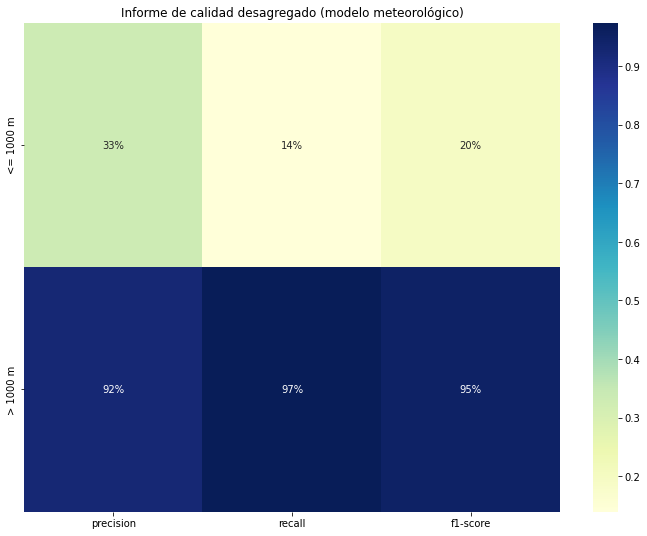

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (modelo meteorológico)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.vis_l, df_all4k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


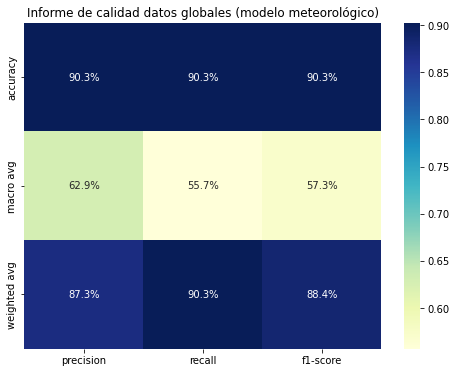

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Informe de calidad datos globales (modelo meteorológico)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

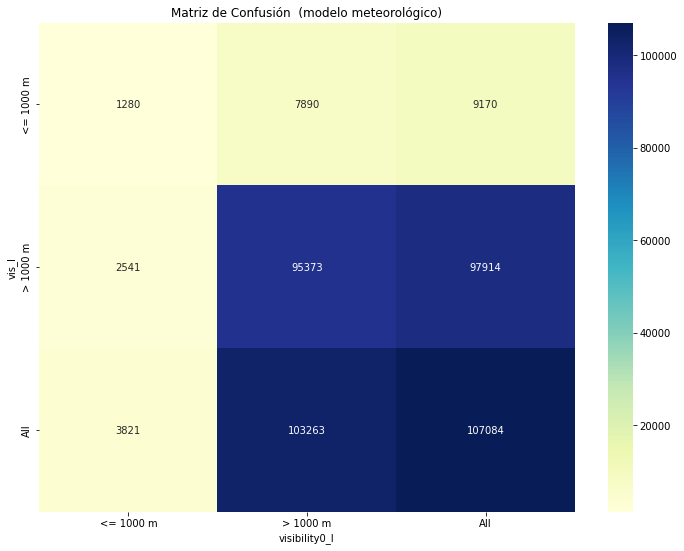

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Matriz de Confusión  (modelo meteorológico)")
import seaborn as sns
global_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

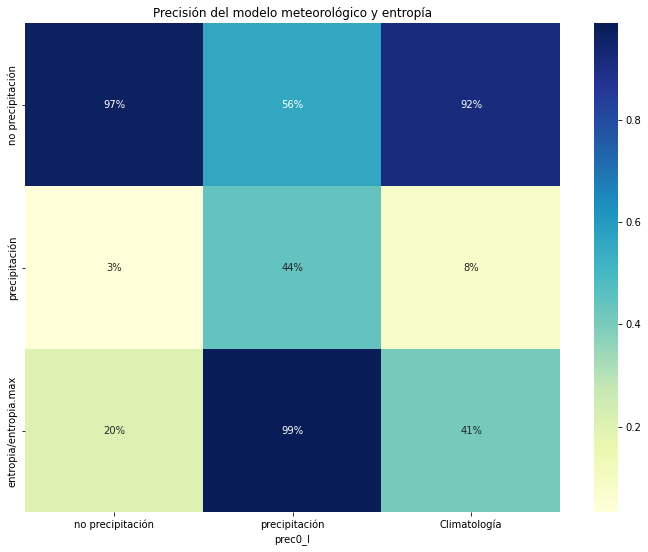

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo meteorológico y entropía")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**machine learning d0 or d1**

In [ ]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k.drop(columns=["visibility0_l","visibility1_l","visibility2_l",
                                    "visibility3_l","visibility4_l","visibility5_l",
                                    "visibility6_l"]),
             target = 'vis_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,vis_l
2,Target Type,Binary
3,Label Encoded,"<= 1000 m: 0, > 1000 m: 1"
4,Original Data,"(107084, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9254,0.8948,0.9921,0.9309,0.9605,0.2956,0.3590,13.584
rf,Random Forest Classifier,0.9249,0.8861,0.9921,0.9304,0.9603,0.2880,0.3522,48.346
lightgbm,Light Gradient Boosting Machine,0.9231,0.8867,0.9897,0.9306,0.9593,0.2854,0.3390,3.342
gbc,Gradient Boosting Classifier,0.9225,0.8721,0.9914,0.9287,0.9590,0.2584,0.3204,134.126
lr,Logistic Regression,0.9154,0.8234,0.9939,0.9201,0.9556,0.1089,0.1718,16.762
ridge,Ridge Classifier,0.9151,0.0000,0.9999,0.9151,0.9556,0.0069,0.0509,0.176
ada,Ada Boost Classifier,0.9157,0.8602,0.9889,0.9243,0.9555,0.1796,0.2294,24.702
dummy,Dummy Classifier,0.9148,0.5000,1.0000,0.9148,0.9555,0.0000,0.0000,0.112
svm,SVM - Linear Kernel,0.9079,0.0000,0.9792,0.9248,0.9510,0.1533,0.1890,7.354
lda,Linear Discriminant Analysis,0.9042,0.8372,0.9624,0.9347,0.9484,0.2812,0.2872,1.044


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [ ]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9247,0.8865,0.9893,0.9325,0.9601,0.3138,0.3643
1,0.9237,0.8875,0.9903,0.9308,0.9596,0.2886,0.3443
2,0.9210,0.8799,0.9897,0.9286,0.9582,0.2536,0.3084
3,0.9226,0.8845,0.9897,0.9302,0.9590,0.2783,0.3321
4,0.9227,0.8818,0.9896,0.9303,0.9590,0.2810,0.3342
Mean,0.9229,0.8840,0.9897,0.9305,0.9592,0.2831,0.3367
SD,0.0012,0.0028,0.0003,0.0013,0.0006,0.0193,0.0181


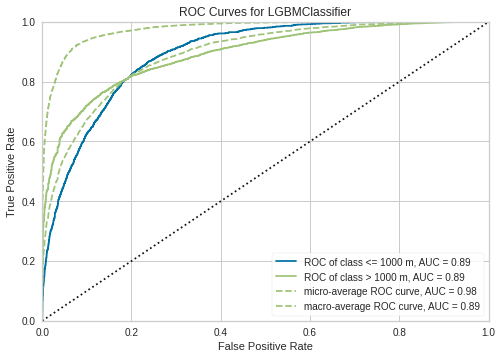

In [ ]:
plot_model(model, plot = 'auc')

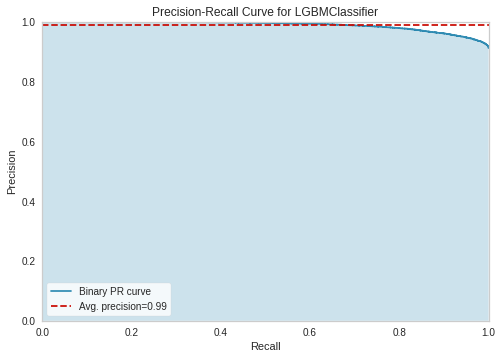

In [ ]:
plot_model(model, plot = 'pr')

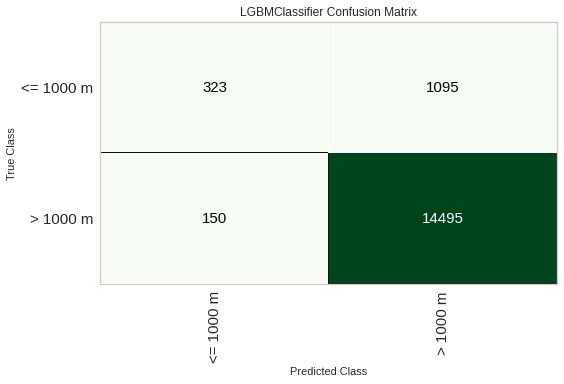

In [ ]:
plot_model(model,'confusion_matrix')

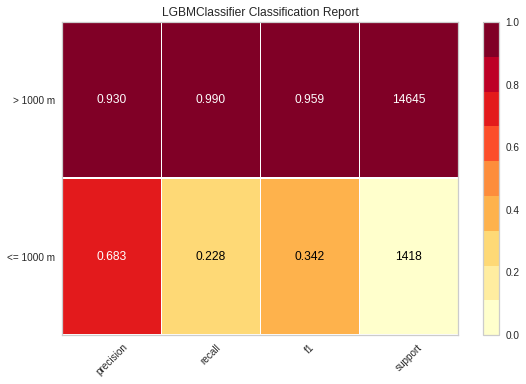

In [ ]:
plot_model(model,'class_report')

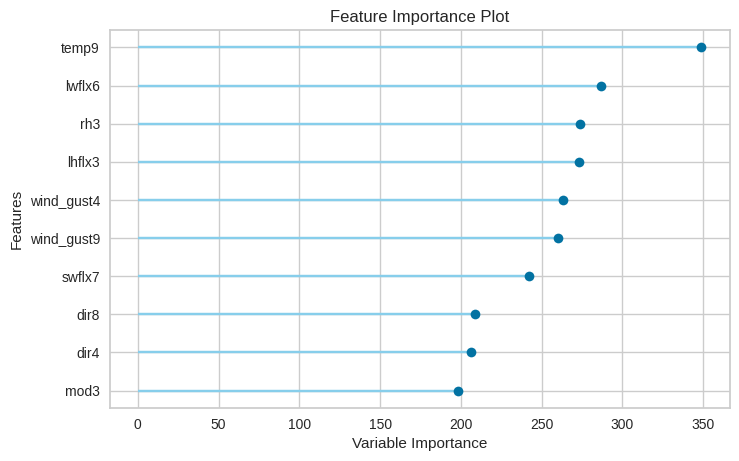

In [ ]:
plot_model(model,"feature")

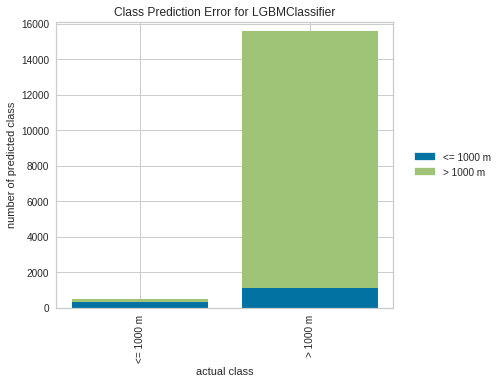

In [ ]:
plot_model(model,"error")

**Export model**

In [ ]:
x_var=get_config("X_train").columns
x_var

Index(['visibility8', 'mod3', 'dir4', 'wind_gust4', 'wind_gust9', 'cfl4',
       'visibility1', 'lhflx3', 'cfl5', 'cfl3', 'dir6', 'dir9', 'temp9',
       'dir8', 'visibility0', 'cfl0', 'cfl1', 'cfl6', 'cfl9', 'visibility3',
       'visibility9', 'visibility2', 'cfl8', 'cfl2', 'swflx7', 'rh3', 'dir7',
       'visibility6', 'cfl7', 'lwflx6', 'visibility4'],
      dtype='object')

In [ ]:
#define x and y
Y=df_all4k.vis_l
X=df_all4k[x_var]

In [ ]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


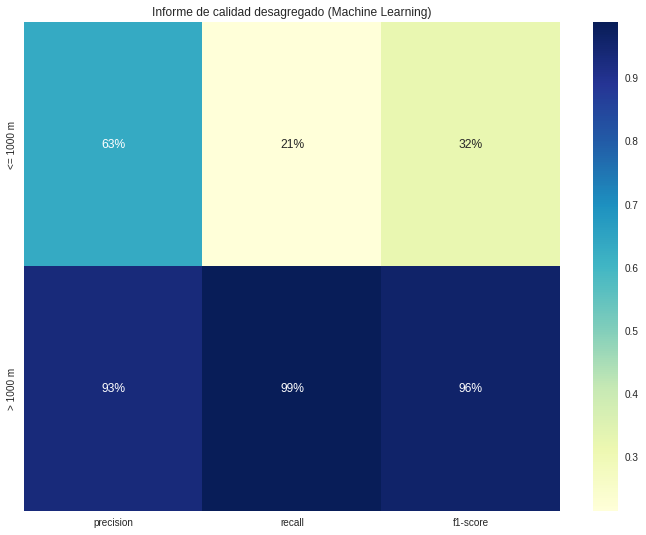

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


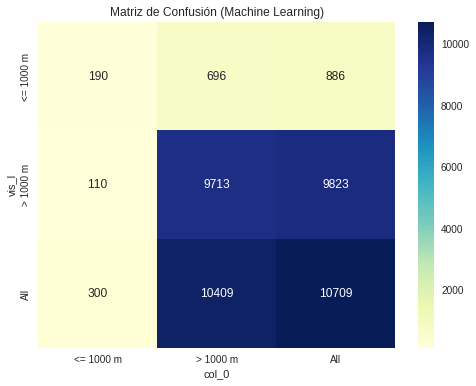

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusión (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

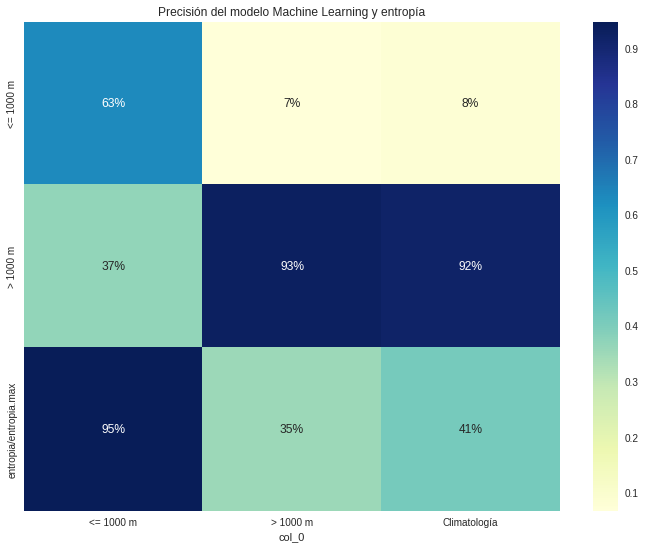

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [ ]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("vis_LEVX_d0.al", 'wb'))